## Summary

Objective: Topic extraction and text mining on biomedical projects report

### Key Points

1. Projects report already been stored in Excel file with following important feature: title, objective, totalCost
1. Topic extraction and text mining will focus on title and objective parts
1. BMRC side have numbers of different files which want to achieve following goals (project, patent, pdf), but they agreed to do the project file first
1. Potential models can help with this problem:
    * Topic extraction: LDA (Latent Dirichlet Allocation) 
    * Word weight ranking: TF-IDF
1. Since no expert specializes in biomedical text mining, we will use normal natural language process technique

### Goals:

1. summarize key words or topics for each project through title and objectives
1. search function by topic: scientists can use key words or topic to find corresponding articles
1. rank hot topics by features, e.g. funding (totalcost column in report), number of appearance etc.



In [1]:
!ls ..

cordis-h2020projects.xlsx  Notebooks


In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sheets_dict = pd.read_excel('../cordis-h2020projects.xlsx', None)

In [4]:
sheets_dict.keys()

dict_keys(['cordis-h2020projects'])

In [5]:
df = sheets_dict['cordis-h2020projects']

In [8]:
df.shape

(30084, 21)

In [6]:
df.head().T

,0,1,2,3,4
rcn,207037,199028,207221,207786,198320
id,734211,686987,733174,700512,676144
acronym,INTERACT,BrainHack,IMPACT TB,CortIMod,SyDAD
status,SIGNED,SIGNED,SIGNED,CLOSED,SIGNED
programme,H2020-EU.1.3.3.,H2020-EU.1.2.1.,H2020-EU.3.1.6.,H2020-EU.1.3.2.,H2020-EU.1.3.1.
topics,MSCA-RISE-2016,FETOPEN-CSA-FETEXCHANGE-2015,SC1-PM-21-2016,MSCA-IF-2015-EF,MSCA-ITN-2015-ETN
frameworkProgramme,H2020,H2020,H2020,H2020,H2020
title,The INTERnAtional network on Crisis Translation,BrainHack: Bringing the arts and sciences of b...,IMPACT TB: Implementing proven community-based...,Implementation and Preliminary Validation of a...,Synaptic Dysfunction in Alzheimer Disease
startDate,2017-04-01,2016-01-01,2017-01-01,2016-11-01,2015-11-01
endDate,2020-03-31,2017-12-31,2019-12-31,2018-11-27,2019-10-31


In [11]:
df['title'].head().values

array(['The INTERnAtional network on Crisis Translation',
       'BrainHack: Bringing the arts and sciences of brain and neural computer interface together',
       'IMPACT TB: Implementing proven community-based active case finding interventions in Vietnam and Nepal',
       'Implementation and Preliminary Validation of a Novel Noninvasive Neuromodulation Technique to Restore Hand Movement and Promote Recovery after Stroke',
       'Synaptic Dysfunction in Alzheimer Disease'], dtype=object)

In [13]:
df['objective'].head(2).values

array(['We propose to establish an interdisciplinary, intersectoral and international research and innovation network in Crisis Translation, called INTERACT. Crisis Translation is understood here as the translation of written information from one linguistic and cultural system to another in the context of a crisis scenario, with a view to enabling affected communities and responders to be prepared for crises, improve resilience and reduce the loss of lives. Due to the transboundary nature of modern day crises, crisis communication must be multilingual and multilingual crisis communication is enabled through translation. Multilingual information access through translation addresses work programme aims such as social fairness and democratic access to essential information for all. The primary focus of INTERACT is on health-related crisis content. The main objectives of the project are 1) to make meaningful and effective contributions to knowledge, policies, expertise, training and techno

In [7]:
df['topics'].value_counts()

EIC-SMEInst-2018-2020    2347
MSCA-IF-2019             1412
MSCA-IF-2018             1372
MSCA-IF-2017             1367
MSCA-IF-2016             1253
                         ... 
SC5-13b-2014                1
S2R-OC-CCA-01-2015          1
S2R-CFM-IP1-02-2016         1
BBI-2016-D08                1
INNOSUP-7-2015              1
Name: topics, Length: 2986, dtype: int64

In [30]:
query = df.query("topics == 'EIC-SMEInst-2018-2020'")

In [31]:
query.shape

(2347, 21)

In [32]:
query.head(3).T

,93,203,239
rcn,221407,218653,217853
id,836347,830294,823614
acronym,LEWIATH,PCSCT,ONCOSMART
status,SIGNED,SIGNED,SIGNED
programme,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.
topics,EIC-SMEInst-2018-2020,EIC-SMEInst-2018-2020,EIC-SMEInst-2018-2020
frameworkProgramme,H2020,H2020,H2020
title,LEveraging WInd-Assisted THrust,Photon Counting Spectral Computed Tomography,ONCOlogic patient profiling and personalized t...
startDate,2019-01-01,2018-10-01,2018-09-01
endDate,2019-04-30,2020-09-30,2021-02-28


In [34]:
query['objective'].head(5).values

array(['Maritime transport dominates global freight transportation with 58,500 vessels totaling covering 90% of global goods trade. Marine propulsion market is expected to grow at a CAGR worth 4.3% to reach $18 Billion by 2026. Climate change imperatives and rising environmental awareness force governments to tighten legislation and set pressure on shipyards and shipowners to develop greener alternatives. Therefore, market potential for wind propulsion technologies for shipping vessels is estimated to reach between 3,700 and 10,700 deployed systems between 2020 and 2030 for both retrofit and installation on newbuild vessels.\n\nCWS is a family story which was incorporated in 2016 to revive commercial sailing. CWS relies on sail automation, mechanical processes miniaturization and IT technologies to fix disadvantages which led to disappearance of commercial sailing vessels one century ago. Our patented technology is inspired by aeronautics and combines (1) Reversible rigs, (2) Telescopi

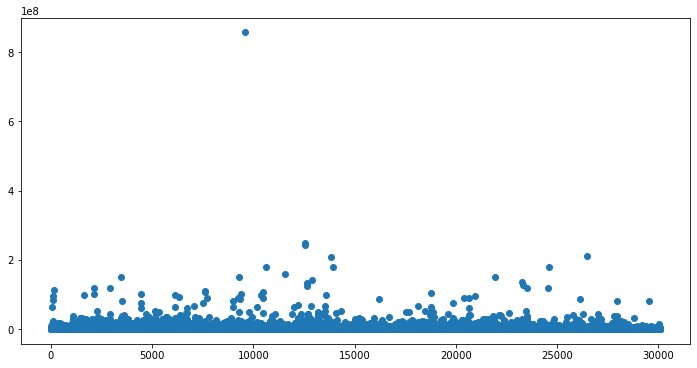

In [25]:
plt.figure(figsize=(12,6))
plt.plot(np.array(df.index), df['totalCost'], 'o')